In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
import unidecode
import re

# fixa a imagem no notebook
%matplotlib inline

A partir da exploração definiu-se que iremos usar os seguintes arquivos como dataset
* arquivo de teste = Test3classes.csv
* arquivo de treino = Train3Classes.csv

* 0 = sentimento NEGATIVO
* 1 = sentimento POSITIVO

In [2]:
dataset = pd.read_csv('../portuguese-tweets-for-sentiment-analysis/trainingdatasets/Train500.csv',delimiter=';')

In [3]:
dataset.sample(5)

,id,tweet_text,tweet_date,sentiment,query_used
240974,1030214959831994368,meu novo twitter :D VOLTEI GALERA!!!! https://...,Thu Aug 16 22:09:21 +0000 2018,1,:)
457136,1040081792248762368,@chweverse tchau 💕 fica bem :( ou tenta:(,Thu Sep 13 03:36:37 +0000 2018,0,:(
395948,1042209339304435713,bar :-( : 48e433a0-ead1-44f3-9f45-e0e5ea48cfb2,Wed Sep 19 00:30:44 +0000 2018,0,:(
282195,1046235001308807170,poxa vida alguem pfvr :( https://t.co/kkHnXxQVGv,Sun Sep 30 03:07:17 +0000 2018,0,:(
448593,1040759854984572929,ai cara que foto linda :(( https://t.co/nhULTi...,Sat Sep 15 00:31:00 +0000 2018,0,:(


### Apaga os tweets repetidos

In [4]:
dataset.drop_duplicates(subset='id', keep = False, inplace = True)

### Apaga algumas colunas que não são importantes

In [5]:
dataset.drop(columns = ["id" ,"tweet_date","query_used"], axis = 1 , inplace = True)

In [6]:
print(dataset.sentiment.value_counts())

1    250000
0    250000
Name: sentiment, dtype: int64


### Coloca em lowercase

In [7]:
for index, row in dataset.iterrows():
    dataset.at[index,'tweet_text'] = row['tweet_text'].lower()

### Retira a acentuação das palavras

In [8]:
for index, row in dataset.iterrows():
    dataset.at[index,'tweet_text'] = unidecode.unidecode(row['tweet_text'])

### Elmina as palavras com @ 
Os nomes de perfis

In [9]:
for index, row in dataset.iterrows():
    # regex : retorna apenas as palavras iniciadas com @
    words_with_arroba = re.findall(r"\@\w+", row['tweet_text'])
    # regex : retorna todas as palavras, :) , :( , :/  e retira as sinalizações
    all_words = re.findall(r"([\w']+|:\(|:\)|:\/|\@\w+)", row['tweet_text'])
    temp = [ws for ws in all_words if ws not in words_with_arroba]
    dataset.at[index,'tweet_text'] = ' '.join(temp)

### Elimina as stop words

In [10]:
# fazemos o download das stop words mais comuns do português
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words("portuguese")
print(stop_words)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

[nltk_data] Downloading package stopwords to /home/pedro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
for index, row in dataset.iterrows():
    # regex : retorna apenas as palavras , ":)" , ":(" e ":/"
    # elimina aos pnts de sinalizacao
    words = re.findall(r"([\w']+|:\(|:\)|:\/)", row['tweet_text'])
    temp = [ws for ws in words if ws not in stop_words]
    dataset.at[index,'tweet_text'] = ' '.join(temp)

### Faz a Stemização 
Que é extrair apenas os radicais das palavras, dessa forma conseguimos evitar as contrações e flexões das palavras

In [12]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /home/pedro/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [13]:
stemmer = nltk.RSLPStemmer()

for index, row in dataset.iterrows():
    #retorna apenas as palavras - eliminando os pnts de sinalizacao
    words = re.findall(r"([\w']+|:\(|:\)|:\/)", row['tweet_text'])
    temp = [stemmer.stem(ws) for ws in words]
    dataset.at[index,'tweet_text'] = ' '.join(temp)

### Função - Word Cloud

In [14]:
from wordcloud import WordCloud

def word_cloud(data):
    text = [str(text) for text in data]

    # um texto enorme, com todas as resenhas
    all_ = ' '.join(text)
    cloud_words = WordCloud(
        width = 500 , height = 300 , 
               max_font_size = 100,
                           collocations = False).generate(all_)


    plt.figure(figsize = (10,8))
    plt.imshow(cloud_words , interpolation = 'bilinear')
    plt.axis("off")
    plt.show()

### Função - Contador de tokens

In [15]:
from nltk import tokenize

def count_tokens(data):
    text = [str(text) for text in data]
    all_ = ''
    all_ = ' '.join(text)

    tokenizador = tokenize.WhitespaceTokenizer()
    tokens = tokenizador.tokenize(all_)

    frequencia = nltk.FreqDist(tokens)

    import pandas as pd
    df_frequencia = pd.DataFrame({
        "Palavra" : list(frequencia.keys()),
        "Frequência" : list(frequencia.values())
    })

    ## mostra as palavras de maior frequencia
    most_frequency = df_frequencia.nlargest(
        columns = "Frequência" , 
        n = 15)

    return most_frequency

# Analise

In [16]:
tweets_positivos = dataset.query('sentiment == 1')
tweets_negativos = dataset.query('sentiment == 0')

## Analise dos tweets positivos

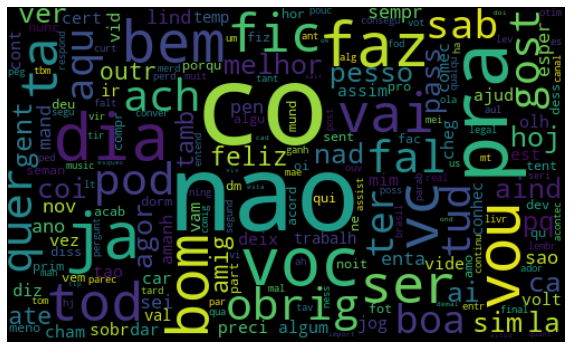

In [17]:
word_cloud(tweets_positivos.tweet_text)

In [18]:
count_tokens(tweets_positivos.tweet_text)

,Palavra,Frequência
4,:),203198
25,:/,58056
26,t,57995
27,co,57825
24,http,57623
64,nao,51487
35,d,30746
130,pra,24876
136,so,18899
80,p,18457


## Analise dos tweets negativos

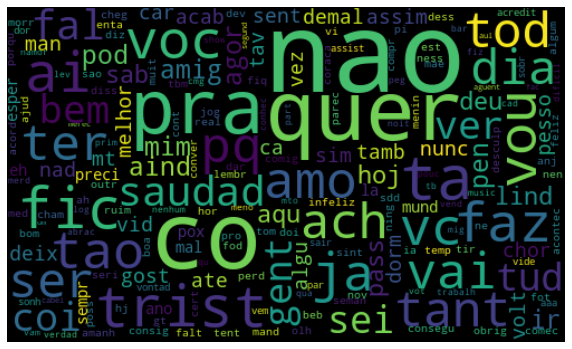

In [19]:
word_cloud(tweets_negativos.tweet_text)

In [20]:
count_tokens(tweets_negativos.tweet_text)

,Palavra,Frequência
1,:(,249713
14,nao,62107
54,:/,40649
55,t,40576
56,co,40372
53,http,40262
11,quer,32519
85,to,26405
28,pra,25415
23,so,22507


## Vamos apagar as words que aparecem frequentemente nas 3 classes de sentimento

In [21]:
# funcao que retorna as N palavras mais frequentes de um texto
def get_n_most_frequency(n,data):
    text = [str(text) for text in data]
    all_ = ''
    all_ = ' '.join(text)

    tokenizador = tokenize.WhitespaceTokenizer()
    tokens = tokenizador.tokenize(all_)

    frequencia = nltk.FreqDist(tokens)

    import pandas as pd
    df_frequencia = pd.DataFrame({
        "Palavra" : list(frequencia.keys()),
        "Frequência" : list(frequencia.values())
    })

    ## mostra as palavras de maior frequencia
    most_frequency = df_frequencia.nlargest(
        columns = "Frequência" , 
        n = n)

    list_n_most_frequency = most_frequency.Palavra
    return list(list_n_most_frequency)

In [22]:
most_frequency_positivo = get_n_most_frequency(25,tweets_positivos.tweet_text)
most_frequency_negativo = get_n_most_frequency(25,tweets_negativos.tweet_text)
equal = list(set(most_frequency_positivo) & set(most_frequency_negativo))
equal

['nao',
 'vc',
 'faz',
 'http',
 'q',
 'pra',
 't',
 'vou',
 'vai',
 'ja',
 'to',
 'fic',
 ':/',
 'co',
 'so',
 'voc',
 'ta']

In [28]:
for index, row in dataset.iterrows():
    # regex : retorna apenas as palavras , ":)" e ":("
    # elimina aos pnts de sinalizacao
    words = re.findall(r"([\w']+|:\(|:\)|:\/)", row['tweet_text'])
    temp = [ws for ws in words if ws not in equal]
    dataset.at[index,'tweet_text'] = ' '.join(temp)

In [24]:
dataset.to_csv(r'treated_dataset.csv',index=False)

In [25]:
tweets_positivos = dataset.query('sentiment == 1')
tweets_negativos = dataset.query('sentiment == 0')
tweets_neutros   = dataset.query('sentiment == 2')

In [26]:
count_tokens(tweets_positivos.tweet_text)

,Palavra,Frequência
4,:),203198
29,d,30746
70,p,18457
143,dia,16822
220,bem,12779
235,bom,12699
56,ser,11796
53,tod,11489
336,obrig,10444
479,pod,10435


In [27]:
count_tokens(tweets_negativos.tweet_text)

,Palavra,Frequência
1,:(,249713
11,quer,32519
21,trist,13949
29,ai,13110
193,tao,11361
83,n,11195
277,amo,10705
23,pq,10196
63,ter,10084
140,tant,9743
